# Relative Vaccinations (Absolute Vaccination/Population Size)

Roshan Sathyanarayana Shenoy (414583)

## Countries: 

* `Australia`
* `USA`
* `Italy`

In [103]:
#Importing required libraries:
import pandas as pd
import requests
import json
import datetime as datetime
import matplotlib.pyplot as plt

In [104]:
#Setting limit to maximum rows displayed:
pd.set_option('display.max_rows', 500)

In [105]:
# Requesting the Covid Cases data from our world in data webiste as a json object:
data_Vax=requests.get('https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/vaccinations.json')

#Dumping all data from json into a variable:
json_object_vax=json.loads(data_Vax.content)

In [106]:
# create an empty dictionary
dict_from_list = {}

# for loop to convert list of dict
# to dict of list
for item in json_object_vax:
	name = item['country']
	dict_from_list[name] = item

In [107]:
#Separating dictonary of Australia from list and adding it to new list:
country_AUS=dict_from_list['Australia']

#Separating the list that contains the data we need from the United Kingdom dictonary:
country_AUS_data=country_AUS['data']

In [108]:
#Creating an empty dictonary to get data(date, vaccination):
dictionary_of_AUS_date_vax={}

#Creating dictonary from the list:
for item in country_AUS_data:
	name = item['date']
	dictionary_of_AUS_date_vax[name] = item

In [109]:
#Creating an empty list:
inter_list_AUS=[]

#Adding all the keys from data dictonary to an empty list:
for key in dictionary_of_AUS_date_vax:
	inter_list_AUS.append(dictionary_of_AUS_date_vax[key])

In [110]:
#Converting list to dataframe:
pd_AUS_inter=pd.DataFrame(inter_list_AUS)

#Renaming the label total_vaccinations column to 'France ratio vaccination:population' (data it holds while plotting)
pd_AUS_inter = pd_AUS_inter.rename(columns={'total_vaccinations':'AUS_ratio_vax_pop'})

#Setting the index of the dataframe to date:
pd_AUS_inter.set_index('date')

#Separating the data columns that we need for the plot (date, total_vaccinations):
pd_AUS_fin= pd_AUS_inter.iloc[:, [0,1]]

#Checking the data types of the final dataframe for France:
pd_AUS_fin.dtypes

date                  object
AUS_ratio_vax_pop    float64
dtype: object

Requesting data that contains population from another web-source so that the population value stays up-to-date:

In [111]:
#Requesting the json containing the population data so as the population number would always stay up-to-date:
data_cases=requests.get('https://covid.ourworldindata.org/data/owid-covid-data.json')

#Loading the json object for extrating population data:
json_object_cases=json.loads(data_cases.content)


In [112]:
pop_AUS=json_object_cases['AUS']['population']

In [113]:
pd_AUS_fin['AUS_ratio_vax_pop']=pd_AUS_fin['AUS_ratio_vax_pop'].div(pop_AUS)

<ipython-input-113-be0dcf7ee746>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_AUS_fin['AUS_ratio_vax_pop']=pd_AUS_fin['AUS_ratio_vax_pop'].div(pop_AUS)


In [114]:
#Separating dictonary of USA from list and adding it to new list:
country_USA=dict_from_list['United States']

#Separating the list that contains the data we need from the USA dictonary:
country_USA_data=country_USA['data']

#Creating an empty dictonary to get data(date, vaccination):
dictionary_of_USA_date_vax={}

#Creating dictonary from the list:
for item in country_USA_data:
	name = item['date']
	dictionary_of_USA_date_vax[name] = item

#Creating an empty list:
inter_list_USA=[]

#Adding all the keys from data dictonary to an empty list:
for key in dictionary_of_USA_date_vax:
	inter_list_USA.append(dictionary_of_USA_date_vax[key])


#Converting list to dataframe:
pd_USA_inter=pd.DataFrame(inter_list_USA)

#Renaming the label total_vaccinations column to 'USA ratio vaccination:population' (data it holds while plotting)
pd_USA_inter = pd_USA_inter.rename(columns={'total_vaccinations':'USA_ratio_vax_pop'})

#Setting the index of the dataframe to date:
pd_USA_inter.set_index('date')

#Separating the data columns that we need for the plot (date, total_vaccinations):
pd_USA_fin= pd_USA_inter.iloc[:, [0,1]]

#Getting the total population of United Kingdom from the above requested json data:
pop_USA=json_object_cases['USA']['population']

#Dividing the vaccinated people by total population to get the ratio:
pd_USA_fin['USA_ratio_vax_pop']=pd_USA_fin['USA_ratio_vax_pop'].div(pop_USA)

<ipython-input-114-ad2c2bf54b27>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_USA_fin['USA_ratio_vax_pop']=pd_USA_fin['USA_ratio_vax_pop'].div(pop_USA)


In [115]:
#Separating dictonary of Italy from list and adding it to new list:
country_ITA=dict_from_list['Italy']

#Separating the list that contains the data we need from the Spain dictonary:
country_ITA_data=country_ITA['data']

#Creating an empty dictonary:
dictionary_of_ITA_date_vax={}

#Creating dictonary from the list:
for item in country_ITA_data:
	name = item['date']
	dictionary_of_ITA_date_vax[name] = item

#Creating an empty list:
inter_list_ITA=[]

#Adding all the keys from data dictonary to an empty list:
for key in dictionary_of_ITA_date_vax:
	inter_list_ITA.append(dictionary_of_ITA_date_vax[key])


#Converting list to dataframe:
pd_ITA_inter=pd.DataFrame(inter_list_ITA)

#Renaming the label total_vaccinations column to 'Italy ratio vaccination:population' (data it holds while plotting)
pd_ITA_inter = pd_ITA_inter.rename(columns={'total_vaccinations':'ITA_ratio_vax_pop'})

#Setting the index of the dataframe to date:
pd_ITA_inter.set_index('date')

# #Converting the date in string format to datetime format:
pd.to_datetime(pd_ITA_inter['date'],format='%Y-%m-%d')

#Separating the data columns that we need for the plot (date, total_vaccinations):
pd_ITA_fin= pd_ITA_inter.iloc[:, [0,1]]

#Getting the total population of Italy:
pop_ITA=json_object_cases['ITA']['population']

#Dividing the vaccinated people by total population to get the ratio:
pd_ITA_fin['ITA_ratio_vax_pop']=pd_ITA_fin['ITA_ratio_vax_pop'].div(pop_ITA)
print(pd_ITA_fin)

           date  ITA_ratio_vax_pop
0    2020-12-27           0.000122
1    2020-12-28           0.000147
2    2020-12-29           0.000165
3    2020-12-30           0.000246
4    2020-12-31           0.000676
..          ...                ...
545  2022-06-25           2.289268
546  2022-06-26           2.289287
547  2022-06-27           2.289547
548  2022-06-28           2.289858
549  2022-06-29           2.290161

[550 rows x 2 columns]


<ipython-input-115-5e3e79e46b60>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_ITA_fin['ITA_ratio_vax_pop']=pd_ITA_fin['ITA_ratio_vax_pop'].div(pop_ITA)


In [116]:
#Creating final dataframe for plot
final_plot = pd.concat([pd_AUS_fin, pd_USA_fin, pd_ITA_fin],sort=False)

#Converting date from string to datetime object type:
final_plot['date']=pd.to_datetime(final_plot['date'])

Plotting the graph:

x axis is date

y axis is ratio of vaccination/total population

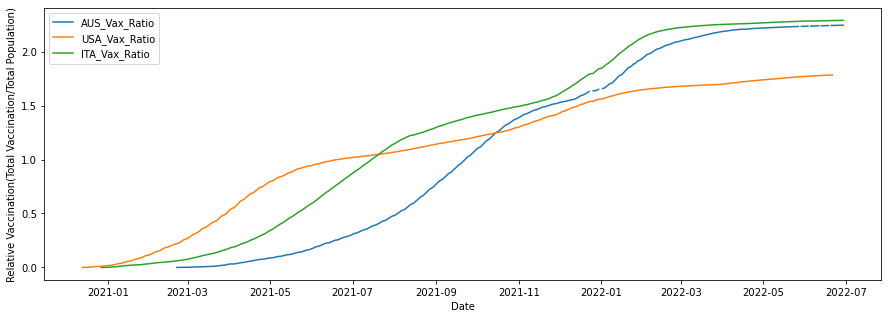

In [117]:
#Defining size of the graph:
plt.figure(figsize=(15,5))

# Plot for Australia:
plt.plot(final_plot["date"],final_plot["AUS_ratio_vax_pop"],label="AUS_Vax_Ratio")

#Plot for USA:
plt.plot(final_plot["date"],final_plot["USA_ratio_vax_pop"],label="USA_Vax_Ratio")

#Plot for Italy:
plt.plot(final_plot["date"],final_plot["ITA_ratio_vax_pop"],label="ITA_Vax_Ratio")

#Creating label for x-axis:
plt.xlabel('Date')

#Creating label for y-axis:
plt.ylabel('Relative Vaccination(Total Vaccination/Total Population)')

#Print the legend:
plt.legend()

#Display plot
plt.show()